In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from simulator import LinearSystemSimulator
from observability import ObservabilityMatrix

### Set up system & simulate a nominal state trajectory

In [2]:
%autoreload 2

A = np.array([[0.0, 1.0],
              [0.0, 0.0]])

B = np.array([[0.0, 0.0],
              [1.0, 0.0]])

C = np.array([[1.0, 0.0],
              [0.0, 1.0]])

# C = np.array([[1.0, 0.0]])

D = np.array([[0.0, 0.0],
              [0.0, 0.0]])

# D = np.array([[0.0, 0.0]])

sys = LinearSystemSimulator(A, B, C, D)

x0 = np.array([1, 1])

fs = 100
ts = 1 / fs
T = 20
tsim = np.arange(0, T, ts).T
usim = np.zeros((len(tsim), 2))
usim[:, 0] = 0*np.sin(2*np.pi*0.5*tsim)
usim[:, 1] = 0*np.sin(2*np.pi*0.5*tsim)
usim = usim
# usim = 1*np.sin(2*np.pi*0.5*tsim)

# Simulate
# measurement_type='divide_first_two_states'
measurement_type = 'linear'
nominal_state, _ = sys.simulate(x0, tsim, usim, measurement_type)

### Compute numerical observability matrix in windows

In [201]:
# Observability
Obsv = ObservabilityMatrix(sys, nominal_state['t'], nominal_state['x'], nominal_state['u'])

time_resolution = np.array([0, 100])
# simulation_time = sys.n * ts
simulation_time = 2
O_all, O_time, deltay_all = Obsv.sliding_O(time_resolution=time_resolution,
                                           simulation_time=simulation_time,
                                           eps=0.001,
                                           measurement_type='linear')

0
1


### Plot nominal state trajectory

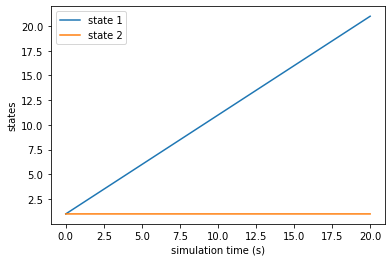

In [6]:
fig, ax = plt.subplots(1, 1)

for x in range(sys.state['x'].shape[1]):
    ax.plot(sys.state['t'], sys.state['x'][:,x], label='state {}'.format(x+1))

ax.set_xlabel('simulation time (s)')
ax.set_ylabel('states')
ax.legend()
# plt.plot(sys.state['t'], sys.state['y'], '--', color='purple')

## Plot matrix elements

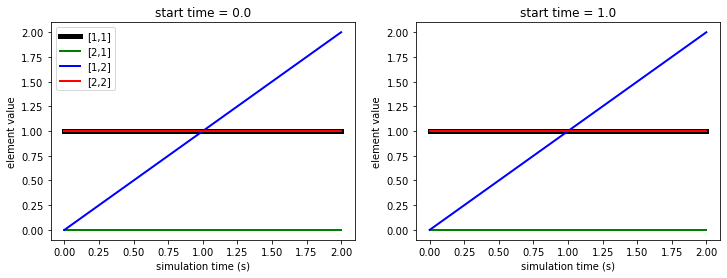

In [204]:
n_plot = len(O_all)
n_point = O_all[0].shape[0]
n_output = O_all[0].shape[1]

# cmap = cm.get_cmap('hsv')
# cmap = cmap(np.linspace(0, 1, sys.n*n_output))
cmap = ['black', 'green', 'blue', 'red']
mksz = 5

fig, ax = plt.subplots(1, n_plot, figsize=(6*n_plot,4))
for o in range(n_plot): # sliding window
    cindex = 0
    for c in range(2): # column
        for n in range(sys.n): # state
            I = np.arange(n, n_point, sys.n)
            matrix_element = "[{},{}]".format(n+1,c+1)
            if (c == 0) and (n == 0):
                lw = 5
            else:
                lw = 2
            element_data = O_all[o][I, c]
            tt = Obsv.dt * np.arange(0, len(element_data), 1)
            ax[o].plot(tt,element_data, label=matrix_element,
                       color=cmap[cindex],
                       linestyle='-',
                       linewidth=lw,
                       marker='',
                       markersize=mksz,
                       alpha=1)
            cindex = cindex + 1

ax[0].legend()
p = 0
for a in ax:
    a.set_xlabel('simulation time (s)')
    a.set_ylabel('element value')
    a.set_title('start time = {}'.format(O_time[p]))
    p = p + 1
plt.show()

In [ ]:
# print(deltay_all[0].shape)
# plt.plot(deltay_all[0][0,0,:])
# plt.plot(deltay_all[0][0,1,:])
# plt.plot(deltay_all[0][1,0,:])
# plt.plot(deltay_all[0][1,1,:])